### input the file location 

In [20]:
text=open('WhatsApp Chat with random_gal.txt','r')
#Example : text=open('WhatsApp Chat with abcman.txt','r')

### do not alter the next two cells

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
aux=[line for line in text]

In [22]:
users=[]
# simply creating an array to read users

In [23]:
def getAuxStr(arr):
    aux=""
    for i in arr:
        aux=aux+" "+str(i)
    return aux.strip()

### How to extract a user? use this

In [24]:
def findUser(arr):
    for i in range(2,len(arr)):
        if arr[i][-1]==":":
            aux_string=getAuxStr(arr[3:i])
            users.append((aux_string+" "+arr[i].split(':')[0]).strip())

In [25]:
for i in aux:
    findUser(i.split())

## how many users did our algo found out?

run the next cell

In [26]:
for i in set(users):
    print i

tere liye
me
acha lgta h tujhe
Vyomika Rawat(kuhu): 1🎸
Mile the
kya lagtay tmko
Shivam negi: Answer
lgta tujhe
Lamha
Acha lagta he
Shivam negi
Vyomika Rawat(kuhu): Magical photo
Vyomika Rawat(kuhu): 100%
one sweet name
Trust me
the
hu tumhre liye
Vyomika Rawat(kuhu)
Shivam negi: In need of any book(.pdf) relating to any subject/field or topic? go to your browser and type
phn mai


# Well, it's a chat between two people.. how can so many users be detected?
Let's clean up a little

In [27]:
threshold=10
verified=[]
for i in set(users):
    count=0
    for j in users:
        if i==j:
            count+=1
    if count>threshold:
        verified.append(i)
    

In [28]:
print verified

['Shivam negi', 'Vyomika Rawat(kuhu)']


### Now, that's better

In [29]:
#declare lists
messeges=[]
sender=[]
date=[]
#note : 0,1 are date and time. 2:x are name and x: is messege


In [30]:
def splitter(mess_array):
    #leave time
    for i in range(2,len(mess_array)-1):
        if mess_array[i][-1]==":":
            aux_string=getAuxStr(mess_array[3:i])
            final_user_string=(aux_string+" "+mess_array[i].split(':')[0]).strip()
            if final_user_string in verified:
                sender.append(final_user_string)
                date.append(mess_array[0])

                aux_str2=""
                for j in range(i+1,len(mess_array)):
                    aux_str2=aux_str2+" "+str(mess_array[j])
                messeges.append(aux_str2.strip())
            

In [31]:
for i in range(1,len(aux)):
    splitter(aux[i].split())

In [32]:
import pandas as pd
import numpy as np

mess_series=pd.Series(v for v in messeges)
sender_series=pd.Series(i for i in sender)
date_series=pd.Series(k for k in date)

In [33]:
df_raw=pd.concat([sender_series,mess_series,date_series],axis=1)

# this is how your database looks like

In [35]:
df_raw.head()

,0,1,2
0,Shivam negi,hi,"28/07/2017,"
1,Vyomika Rawat(kuhu),Shivam?,"28/07/2017,"
2,Shivam negi,hmm,"28/07/2017,"
3,Vyomika Rawat(kuhu),Ok,"28/07/2017,"
4,Vyomika Rawat(kuhu),Save karlia,"28/07/2017,"


In [36]:
df_raw.columns=['Sender','Messeges','Date']

# ahh.. that's a lil better

In [39]:
df_raw.head()

,Sender,Messeges,Date
0,Shivam negi,hi,"28/07/2017,"
1,Vyomika Rawat(kuhu),Shivam?,"28/07/2017,"
2,Shivam negi,hmm,"28/07/2017,"
3,Vyomika Rawat(kuhu),Ok,"28/07/2017,"
4,Vyomika Rawat(kuhu),Save karlia,"28/07/2017,"


In [40]:
def clean_date(raw_stuff):
    main=raw_stuff.split(',')[0]
    print main
    return int(main.split('/')[0])
    
def clean_month(raw_stuff):
    main=raw_stuff.split(',')[0]
    print main
    return int(main.split('/')[1])

'''def clean_year(raw_stuff):
   main=raw_stuff.split(',')[0]
    print main
    if len(main.split('/')==3):
        return int('20'+main.split('/')[2])'''
#This is to be developed. And we really don't need em. Trust me

    
    

"def clean_year(raw_stuff):\n   main=raw_stuff.split(',')[0]\n    print main\n    if len(main.split('/')==3):\n        return int('20'+main.split('/')[2])"

In [45]:
df_raw['Length']=df_raw['Messeges'].apply(len)

# If you want to check how many messeges a person sent?

The *x axis* is frequency of messeges and the *y axis* is number of words in that message

In [ ]:
sns.set_style('whitegrid')
df_raw.hist(column='Length',by='Sender',bins=50,figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb41c1b7750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb41a12a150>], dtype=object)

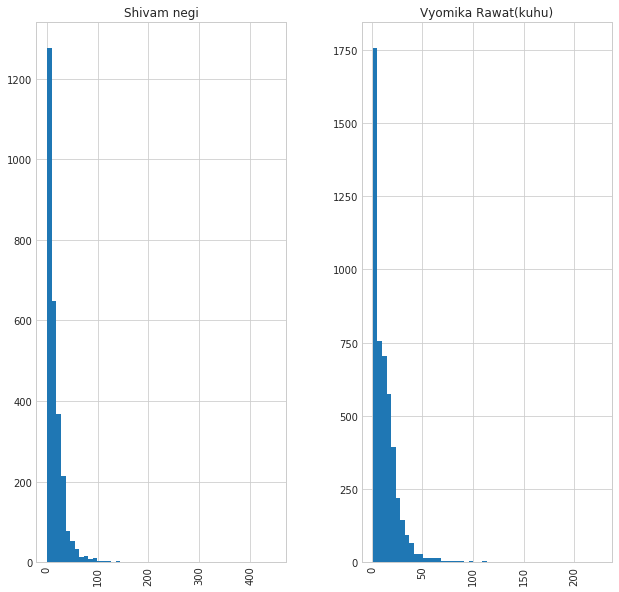

In [44]:
# Example graph looks like this

In [47]:
df_raw.drop(['Date'],axis=1,inplace=True)

In [49]:
#getting dummies now
names=pd.get_dummies(df_raw['Sender'],drop_first=True)

In [50]:
#df_raw.drop(['Sender'],axis=1,inplace=True)
df_final=pd.concat([df_raw,names],axis=1)

In [51]:
def giveName():
    main=['Messeges','Length','Month']
    for i in df_final.columns:
        if i not in main:
            return i

# Normal NLTK stuff
all copy pasted from my intial sources, the brain behind the program

In [52]:
from nltk.corpus import stopwords
import string

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

from sklearn.model_selection import train_test_split
to_be_used=giveName()
msg_train, msg_test, label_train, label_test =train_test_split(df_final['Messeges'],df_final[to_be_used], test_size=0.2)


In [53]:
pipeline.fit(msg_train,label_train)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7fb412b71500>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [60]:
from sklearn.metrics import classification_report

In [61]:
pred=pipeline.predict(msg_test)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [62]:
print classification_report(pred,label_test)

                     precision    recall  f1-score   support

        Shivam negi       0.74      0.94      0.83       453
Vyomika Rawat(kuhu)       0.97      0.86      0.91      1070

        avg / total       0.90      0.88      0.89      1523

